In [115]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [116]:
train_data_dir = 'day_night/training'
test_data_dir = 'day_night/test'

In [117]:
def load_dataset(path):
    images = []
    types = ['day', 'night']
    for i in types:
        for img_path in glob.glob(os.path.join(path, i, '*')):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            images.append((img, i))
    return images

In [118]:
train_images = load_dataset(train_data_dir)
test_images = load_dataset(test_data_dir)

In [119]:
train_images

[(array([[[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [176, 209, 228],
          [177, 210, 229],
          [177, 210, 229]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [180, 213, 232],
          [180, 213, 232],
          [180, 213, 232]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [177, 210, 229],
          [177, 210, 229],
          [177, 210, 229]],
  
         ...,
  
         [[ 35,  40,  43],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 65,  73,  75],
          [ 65,  73,  75],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 68,  76,  78],
          [ 68,  76,  78],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47

In [120]:
test_images

[(array([[[140, 185, 227],
          [143, 188, 230],
          [143, 188, 230],
          ...,
          [158, 200, 238],
          [158, 200, 238],
          [155, 197, 235]],
  
         [[146, 191, 233],
          [148, 193, 235],
          [148, 193, 235],
          ...,
          [161, 203, 241],
          [161, 203, 241],
          [159, 201, 239]],
  
         [[143, 188, 230],
          [146, 191, 233],
          [145, 190, 232],
          ...,
          [159, 201, 239],
          [159, 201, 239],
          [156, 198, 236]],
  
         ...,
  
         [[ 71,  74,  67],
          [ 70,  73,  66],
          [ 69,  72,  65],
          ...,
          [ 72,  78,  90],
          [ 71,  77,  89],
          [ 71,  77,  89]],
  
         [[ 68,  70,  65],
          [ 82,  84,  79],
          [ 72,  74,  69],
          ...,
          [ 73,  81,  94],
          [ 72,  80,  93],
          [ 71,  79,  92]],
  
         [[ 72,  74,  69],
          [ 85,  87,  82],
          [ 74,  76,  71

In [121]:
len(train_images)

240

In [122]:
train_images.extend(test_images)

In [123]:
len(train_images)

400

In [124]:
x_size = [i[0].shape[1] for i in train_images]
y_size = [i[0].shape[0] for i in train_images]

In [125]:
x_mean = np.mean(x_size)
y_mean = np.mean(y_size)

In [126]:
print(x_mean, y_mean)

856.0675 568.1525


In [127]:
def same(img):
    img = cv2.resize(img, dsize=(860, 570))
    return img

In [128]:
def encode(target):
    if target == 'day':
        return 1
    return 0

In [129]:
def preprocessing(images):
    result_images = []
    for img in images:
        result_images.append((same(img[0]), encode(img[1])))
    return result_images

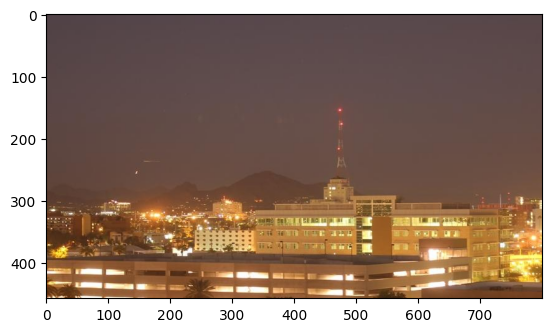

In [130]:
plt.imshow(train_images[138][0])
plt.show()

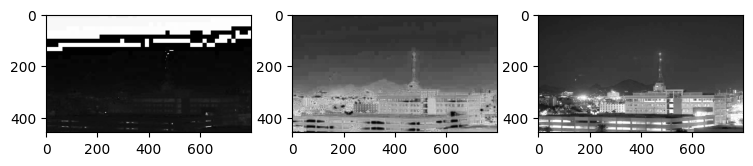

In [131]:
test_img = cv2.cvtColor(train_images[138][0], cv2.COLOR_RGB2HSV)

H, S, V = np.dsplit(test_img, 3)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(H, cmap='gray')

plt.subplot(132)
plt.imshow(S, cmap='gray')

plt.subplot(133)
plt.imshow(V, cmap='gray')

plt.show()

In [134]:
def get_hsv(images):
    Vs = []
    for item in images:
        img = cv2.cvtColor(item[0], cv2.COLOR_RGB2HSV)
        V = img[:, :, 2]
        Vs.append((V, item[1]))
    return Vs

In [135]:
result_images = get_hsv(preprocessing(train_images))

In [138]:
def show_images(images, rows, cols):
    plt.figure(figsize=(15, 9))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.title(f"{i + 1} - image")
        plt.imshow(images[i][0], cmap='gray')
    plt.show()

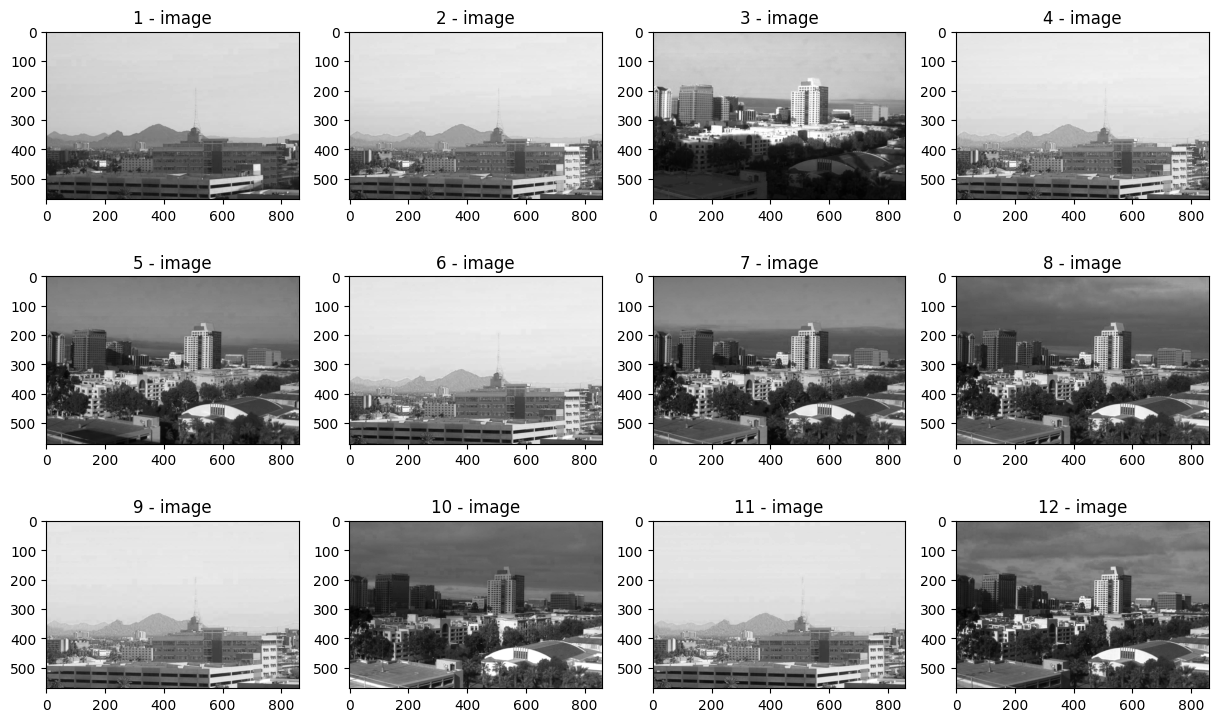

In [139]:
show_images(result_images, 3, 4)

In [140]:
len(result_images)

400

In [141]:
def split_dataset(images, n=0.4):
    train = []
    test = []

    for i in range(int(len(images) * (1 - n))):
        train.append(images[i])

    for i in range(int(len(images) * (1 - n)), len(images)):
        test.append(images[i])

    return train, test

In [142]:
train, test = split_dataset(result_images)

In [143]:
len(train)

240

In [144]:
len(test)

160

In [145]:
train_sum = np.array([np.sum(img[0]) for img in train])

In [146]:
train_sum

array([85829493, 94562236, 64776832, 97915665, 53901233, 98049270,
       54973569, 50642244, 97106019, 51095043, 96790289, 51718735,
       95637499, 53148277, 95808863, 52769977, 96479640, 93758304,
       54729963, 89083850, 54066876, 92010647, 53451137, 92297294,
       54045986, 92954778, 52627714, 93888940, 51767127, 50672521,
       71330217, 80300726, 78550866, 60595368, 77456671, 74656666,
       77144386, 51009668, 76135354, 63646382, 68061177, 63561779,
       73242678, 63593256, 63349989, 62772363, 54534383, 62717385,
       75506669, 69117007, 61681028, 76059953, 62115095, 62743561,
       63392916, 80664641, 62947502, 70425303, 64592854, 72931429,
       64206848, 63494425, 62659362, 53485266, 63043859, 67689577,
       52354662, 67067034, 55027185, 75587903, 62297863, 48031905,
       76974240, 70059693, 46349759, 77811381, 70625529, 52287733,
       78052544, 69867953, 53963036, 78327807, 50043424, 56387684,
       65371033, 58940194, 67131079, 56996253, 64164321, 55366

In [147]:
train_sum_day = np.array([train_sum[i] for i in range(len(train)) if train[i][1] == 1])

In [148]:
train_sum_day

array([85829493, 94562236, 64776832, 97915665, 53901233, 98049270,
       54973569, 50642244, 97106019, 51095043, 96790289, 51718735,
       95637499, 53148277, 95808863, 52769977, 96479640, 93758304,
       54729963, 89083850, 54066876, 92010647, 53451137, 92297294,
       54045986, 92954778, 52627714, 93888940, 51767127, 50672521,
       71330217, 80300726, 78550866, 60595368, 77456671, 74656666,
       77144386, 51009668, 76135354, 63646382, 68061177, 63561779,
       73242678, 63593256, 63349989, 62772363, 54534383, 62717385,
       75506669, 69117007, 61681028, 76059953, 62115095, 62743561,
       63392916, 80664641, 62947502, 70425303, 64592854, 72931429,
       64206848, 63494425, 62659362, 53485266, 63043859, 67689577,
       52354662, 67067034, 55027185, 75587903, 62297863, 48031905,
       76974240, 70059693, 46349759, 77811381, 70625529, 52287733,
       78052544, 69867953, 53963036, 78327807, 50043424, 56387684,
       65371033, 58940194, 67131079, 56996253, 64164321, 55366

In [149]:
train_sum_night = np.array([train_sum[i] for i in range(len(train)) if train[i][1] == 0])

In [150]:
train_sum_night

array([16547353, 16180146, 14935859, 14420254, 12773001, 12568609,
       12557793, 12608903, 12646847, 12582969, 13634957, 23171422,
       23738313, 23681961, 12677652, 23874165,  4014789, 13569021,
       58625549,  4135585,  6758431, 12605566, 54090552,  4071260,
        6740448, 12633031, 53662045,  3976591,  7058955, 53421640,
        6500671,  7125135, 55507047,  6849768, 56033368, 55319661,
       56312292, 56239941, 55389174, 13674317, 56066939, 14244573,
       55714026, 13203883, 54648823, 53981401, 35118161, 53651092,
       10364426, 35392166, 53807787, 12368791, 35289276, 53182492,
       12010359, 35943722, 11925477, 35566573, 12120735, 11225392,
       17628127, 48674552, 17728197, 48410724, 48513060, 50177564,
       48383307, 48661469, 48560927, 48689608, 17255553, 48644333,
       48514876, 49784440, 48562941, 48544884, 48608971, 48774738,
       19268750, 48828365, 48924801, 50366279, 48588153, 48718121,
       48378381, 18406493, 47483539, 43336134, 46608865, 47497

In [151]:
len(train_sum_day)

120

In [152]:
len(train_sum_night)

120

In [153]:
day_data = {
    'Day min': train_sum_day.min(),
    'Day mean': train_sum_day.mean(),
    'Day max': train_sum_day.max(),
}
day_data

{'Day min': 46349759, 'Day mean': 67319224.68333334, 'Day max': 98049270}

In [154]:
day_night = {
    'Night min': train_sum_night.min(),
    'Night mean': train_sum_night.mean(),
    'Night max': train_sum_night.max(),
}
day_night

{'Night min': 3976591, 'Night mean': 33906697.78333333, 'Night max': 58625549}

In [155]:
index = 0

for i in range(len(train_sum)):
    if train_sum[i] == 136979202:
        index = i

In [156]:
index

0

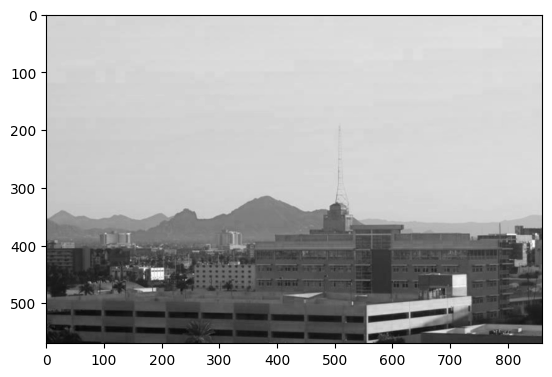

In [158]:
plt.imshow(train[index][0], cmap='gray')
plt.show()

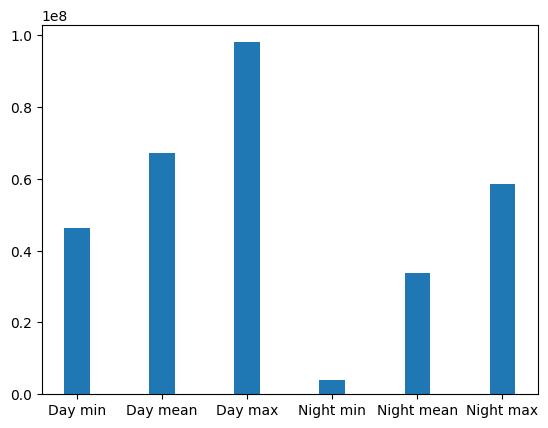

In [159]:
y = [day_data["Day min"], day_data["Day mean"], day_data["Day max"], day_night["Night min"], day_night["Night mean"],
     day_night["Night max"], ]
x = ["Day min", "Day mean", "Day max", "Night min", "Night mean", "Night max"]
plt.bar(x, y, width=0.3)
plt.show()

In [160]:
mean_diff = (day_data['Day mean'] + day_night['Night mean']) / 2
mean_diff

50612961.233333334

In [162]:
line_norm = mean_diff / train[0][0].shape[0] / train[0][0].shape[1]
line_norm

103.24961491908064

# Train preprocess

In [163]:
test

[(array([[227, 230, 230, ..., 238, 238, 235],
         [231, 233, 233, ..., 240, 240, 238],
         [231, 234, 233, ..., 240, 240, 237],
         ...,
         [ 72,  78,  74, ...,  92,  91,  90],
         [ 71,  83,  76, ...,  94,  93,  92],
         [ 74,  85,  78, ...,  94,  93,  92]], dtype=uint8),
  1),
 (array([[195, 193, 191, ..., 177, 173, 211],
         [194, 194, 193, ..., 177, 174, 211],
         [194, 194, 193, ..., 177, 173, 211],
         ...,
         [ 69,  69,  69, ...,  63,  75,  68],
         [ 65,  65,  65, ...,  56,  66,  59],
         [ 81,  81,  80, ...,  56,  66,  55]], dtype=uint8),
  1),
 (array([[234, 233, 232, ..., 239, 238, 234],
         [235, 234, 233, ..., 243, 242, 238],
         [236, 235, 234, ..., 243, 242, 238],
         ...,
         [105, 114, 113, ...,  99,  99,  99],
         [ 98, 109, 109, ..., 101, 101, 102],
         [ 97, 107, 106, ..., 101, 101, 102]], dtype=uint8),
  1),
 (array([[210, 210, 210, ..., 202, 203, 203],
         [210, 210, 2

In [168]:
def mean_img(images):
    mean_images = []
    for i in images:
        mean_images.append((np.mean(i[0]), i[1]))
    return mean_images

In [169]:
test_means = mean_img(test)

In [170]:
test_means[:11]

[(194.22486332109344, 1),
 (157.8330375356997, 1),
 (201.6063769889841, 1),
 (191.23770297837618, 1),
 (188.11746022031824, 1),
 (185.9164075887393, 1),
 (183.71721338229295, 1),
 (184.66676254589964, 1),
 (161.98744798041616, 1),
 (157.65057527539778, 1),
 (124.34119951040391, 1)]

In [179]:
def testing(images, line_norm):
    S = 0
    for i in images:
        if line_norm < i[0]:
            target = 1
        else:
            target = 0
        if target != i[1]:
            S += 1
    return S


In [180]:
missed = testing(test_means, line_norm)
missed

12

In [184]:
100 - (missed / len(test_means)) * 100

92.5